# Data Visualization 003

## Multivariate plots

- importez les librairies suivantes :
    - `pandas` en tant que `pd`
    - `seaborn` en tant que `sns`

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16,8)

- importez `data/iris.csv` :

In [5]:
df = pd.read_csv("data/iris.csv", index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


- faites un `describe` :

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- count == shape[0] => virifier na pas variable manquant

- tracez un `lmplot` avec `SepalLengthCm` en abscisse et `PetalLengthCm` en ordonnée et affichez les points en fonctions de leur espèce (`Species`) :

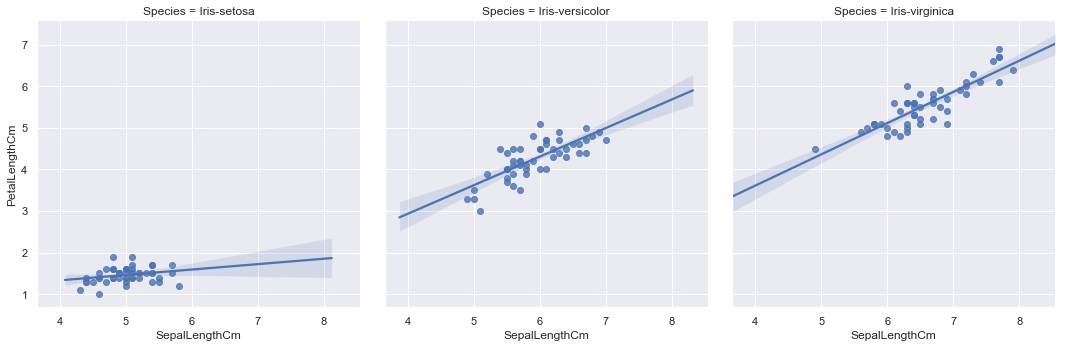

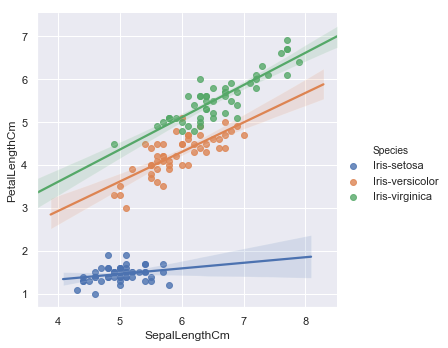

In [41]:
sns.lmplot(x='SepalLengthCm', y='PetalLengthCm', data=df, col='Species')
sns.lmplot(x='SepalLengthCm', y='PetalLengthCm', data=df, hue='Species')

_Prenez le temps de bien lire ce graphique. Que vous apprend-il ?_
> - ça nous donne des idéas sur des prédictives, ex: en tant donné des donnes en longeur de pétale, on peut prédire quel type de fleurs

### Heat map

- calculez la corrélation par pairs de colonne :

In [29]:
cor_ = df.corr()
cor_

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


- affichez ce tableau de corrélations sous forme de **heat map** :

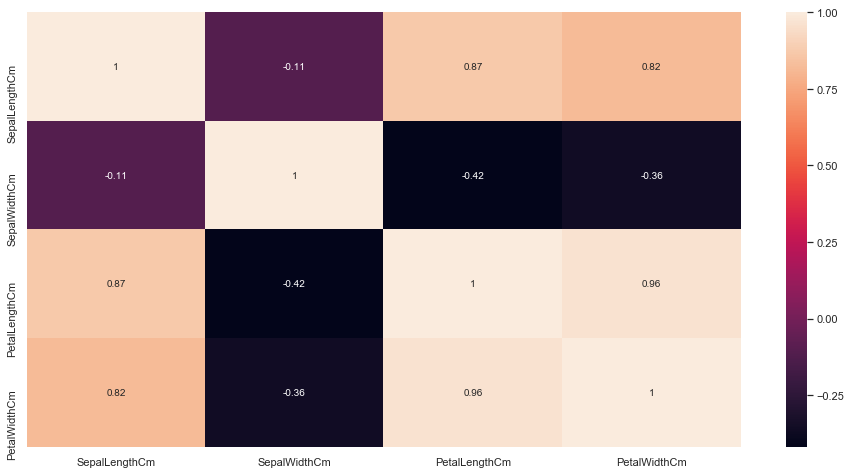

In [55]:
sns.heatmap(data=cor_,annot=True)

_Que signifie corrélation ? Que veulent-dire les chiffres obtenus ?_

### Pair plot

- tracez un **pair plot** :

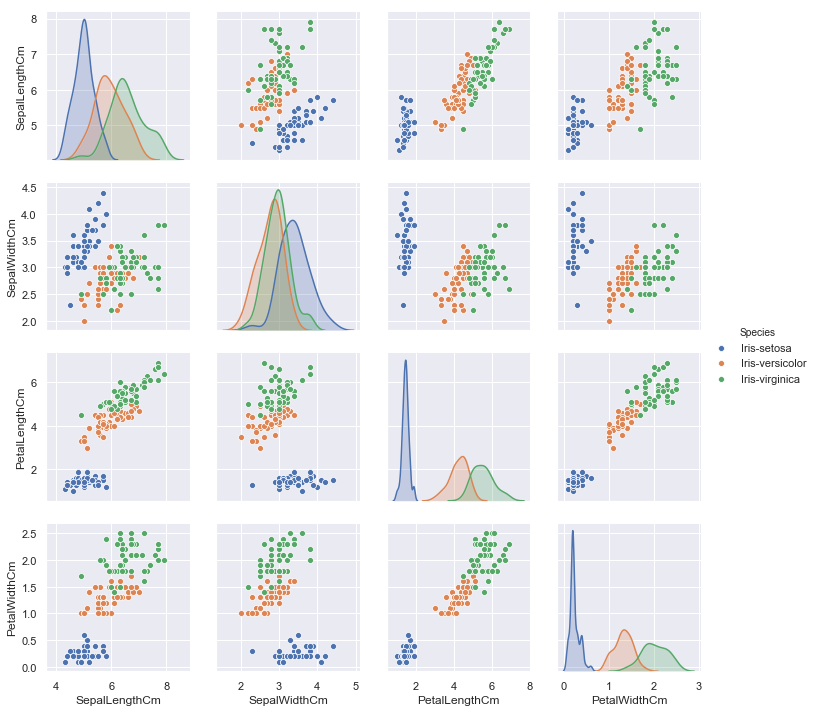

In [50]:
sns.pairplot(data=df,hue='Species')

### Facet grid

`FacetGrid` permet d'afficher plusieurs graphes de manière très facile et intuitive.

- affichez pour chaque espèce un `kdeplot` de valeurs `PetalLengthCm` :

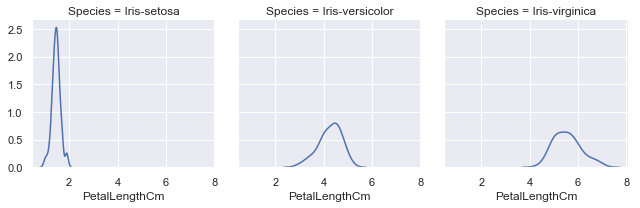

In [57]:
#sns.pairplot(data=df, diag_kind='kde')
g = sns.FacetGrid(df, col='Species') #hue to stack all Species in one graph or use col to 3 graph differents in each flower
g.map(sns.kdeplot,'PetalLengthCm')